<a href="https://colab.research.google.com/github/VMVoron/ITMO/blob/main/Prob_theory_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дано распределение плотности показательного распределения со смещением:

$$
    f_{\xi}^{\lambda, a}(x) =
    \begin{cases}
        \lambda e^{-\lambda(x-a)},&\ x \ge a, \\
        0, &\ else
    \end{cases}
$$

1. Аналитически вычислите значение моды, матожидания и медианы
случайной величины.

Мода $Mo_{\xi}x - $ то возможное значение x, при котором $f_{\xi}(x) = max$

Найдем производную

$$
{f'}(x) = (\lambda e^{-\lambda(x-a)})' = -\lambda^2 e^{-\lambda(x-a)}
$$

$$-\lambda^2 e^{-\lambda(x-a)} = 0$$

решений нет. Моды нет или она равна 0?

Матожидание

$$ M_{\xi}(x) = \int_{-∞}^{∞}xf(x)dx $$

$$ M_{\xi}(x) = \int_{-∞}^{∞}x\lambda e^{-\lambda(x-a)}dx=\lambda\int_{-∞}^{∞}x e^{-\lambda(x-a)}dx  =| u=x; du = dx; dv = e^{- \lambda (x-a)}| = x (-\lambda) e^{- \lambda (x-a)} + \int_{-∞}^{∞} \lambda e^{-\lambda}(x-a)dx = - \lambda x e^{- \lambda(x-a)} - \lambda^2 e^{-\lambda(x-a)} \Bigg|_{-∞}^{+∞} = e^{-x(x-a)}(- \lambda x - \lambda^2) \Bigg|_{-∞}^{+∞}   $$

Пусть $ \lambda = 0.5 $, $a = 2$

In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
l = 0.5
a = 2

In [ ]:
def m(l, a):
  m = -(- a - l)
  return m

In [ ]:
m(l,a)

2.5

Мода

Поскольку больше и меньше медианы располагаются равное количество значений случайной величины, для нахождения значения медианы надо от функции плотности перейти к функции распределения, приравнять данную функцию к нулю и найти соответствующее значение переменной.

$$
    F(x) = \int\limits_{-\infty}^{+\infty} f(x)dx
$$

$$
   \int\limits_{a}^{z} f(x)dx=\int\limits_{a}^{z} \lambda e^{-\lambda(x-a)}dx = \lambda e^{\lambda a}\int\limits_{a}^{z} e^{-\lambda x}dx = \frac{-\lambda}{\lambda}e^{\lambda a}e^{-\lambda x} \Bigg|_{a}^{z}= -e^{\lambda (a-x)} \Bigg|_{a}^{z} = -e^{\lambda(a-z)} + e^{\lambda(a+a)}
$$

$$ -e^{\lambda(a-z)} + e^{\lambda(a+a)} = 0 $$
$$ e^{\lambda(a-z)} = e^{\lambda(a+a)} $$
$$ \lambda(a-z) = \lambda(a+a) $$
$$ a-z = a+ a$$
$$a = z $$

Мода = 2

Медиана

$F_{\xi}x = \int\limits_{a}^{x} e^{t-a}dt = \frac{1}{2} $

In [ ]:
import sympy as smp

x, lambda_val, a = smp.symbols('x lambda a')
cdf_expr = smp.integrate(lambda_val*smp.exp(-lambda_val*(x-a)), (x,a,x))
cdf_expr

1 - exp(-lambda*(-a + x))

In [ ]:
import sympy as smp

x = smp.symbols('x')

lambda_val = 0.5
a = 2

pdf = lambda_val * smp.exp(-lambda_val * (x - a))

cdf = smp.integrate(pdf, (x, a, x))

# Solve for x when CDF(x) = 0.5 to find the median
analytical_median = smp.solve(cdf - 0.5, x)
analytical_median

[3.38629436111989]

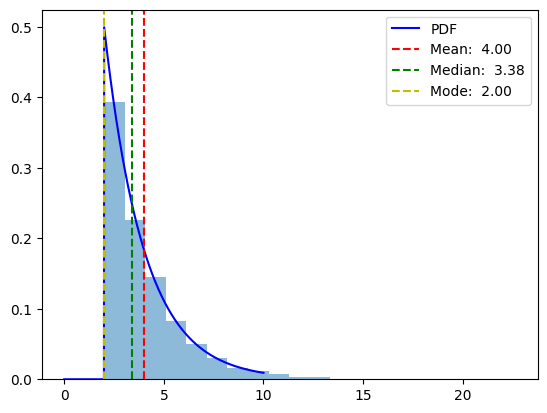

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

num_samples = 10000
lambda_val = 0.5
a = 2

def pdf_function(x, lambda_val, a):
    return lambda_val * np.exp(-lambda_val * (x - a)) * (x >= a)

def inverse_cdf_analytic(u, lam, a):
    return (np.log((-np.exp(a*lam)/(u-1)))/lam)

def manual_median(data):
    data.sort()
    data_len = len(data)

    if data_len % 2 == 1:
        median = data[data_len // 2]
    else:
        median = (data[data_len // 2] + data[data_len // 2 + 1]) / 2

    return median


x_values = np.linspace(0, 10, 1000)

plt.plot(x_values, pdf_function(x_values, lambda_val, a), label='PDF', color='b')

uniform_sample = np.random.rand(num_samples)

inverse_sample = [inverse_cdf_analytic(u, lambda_val, a) for u in uniform_sample]

inverse_sample_mean = sum(inverse_sample) / len(inverse_sample)
inverse_sample_median  = manual_median(inverse_sample)
inverse_sample_mode = mode(inverse_sample, keepdims=False)[0]

plt.axvline(inverse_sample_mean, linestyle='--', color='r', label=f'Mean: {inverse_sample_mean : .2f}')
plt.axvline(inverse_sample_median, linestyle='--', color='g', label = f'Median: {inverse_sample_median : .2f}')
plt.axvline(inverse_sample_mode, linestyle='--', color='y', label = f'Mode: {inverse_sample_mode : .2f}')
plt.legend()

plt.hist(inverse_sample, bins=20, density=True, alpha=0.5)

plt.show()

In [ ]:
l = 1/2
a = 2

задание

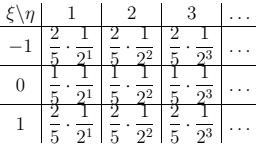

Корреляционная матрица представляет собой отнормированную ковариационную матрицу.

$$
    Corr({\xi, \eta}) = \frac{Cov({\xi, \eta})}{\sqrt{Var(\xi)} \cdot \sqrt{ Var(\eta)}}
$$

$$
    Cov(\xi, \eta) = M({\xi \eta}) - M({\xi}) \cdot M({\eta})
$$

Ковариационная матрица

$$
\begin{array}{|c|c|c|c|}
\hline
Cov({\xi, \xi}) & Cov({\xi, \eta}) \\
\hline
Cov({\xi, \eta}) & Cov({\eta, \eta})   \\
\hline
\end{array}
$$

$$
     M({\xi \eta}) = -1 \cdot \frac{2}{5} \cdot \frac{1}{2^\eta} + 0 \cdot \frac{1}{5} \cdot \frac{1}{2^\eta} + 1 \cdot \frac{2}{5} \cdot \frac{1}{2^\eta} = 0
$$

$$
    M({\xi}) = -1 \cdot \frac{2}{5}  + 0 \cdot \frac{1}{5}  + 1 \cdot \frac{2}{5}  = 0
$$

$$M({{\xi}^2})=1 \cdot \frac{2}{5}  + 0 \cdot \frac{1}{5}  + 1 \cdot \frac{2}{5}  = \frac{4}{5}
$$

$$
M({\eta}) = \sum_{\eta=1}^N \eta \cdot P{\eta} = \sum_{\eta=1}^N \eta \cdot \frac{1}{2^\eta}
$$

$$
M({\eta}^2) = \sum_{\eta=1}^N \eta^2 \cdot P{\eta} = \sum_{\eta=1}^N \eta^2 \cdot \frac{1}{2^\eta}
$$

$$
\begin{array}{|c|c|c|c|}
\hline
\frac{4}{5} & 0 \\
\hline
0 & \sum_{\eta=1}^N \eta^2 \cdot \frac{1}{2^\eta} -(\sum_{\eta=1}^N \eta \cdot \frac{1}{2^\eta})^2   \\
\hline
\end{array}
$$

$$ Var_{\xi} = 4/5 $$

In [ ]:
experiments = 100000

In [ ]:
eta = np.arange(1, 50)
probabilities_eta = 1 / 2 ** eta
eta_array = np.random.choice(eta, size=experiments, p=probabilities_eta)

In [ ]:
xi = np.array([-1, 0, 1])
probabilities_xi = np.array([2/5, 1/5, 2/5])
xi_array = np.random.choice(xi, size=experiments, p=probabilities_xi)

In [ ]:
np.corrcoef(eta_array, xi_array)

array([[1.        , 0.00227354],
       [0.00227354, 1.        ]])